In [5]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import zipfile
zip_path = '/content/drive/MyDrive/Data_Snakes.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [14]:
from sklearn.utils import class_weight

venomous_path = os.path.join('/content/Data_Snakes/train_all', "venomous")
nonvenomous_path = os.path.join('/content/Data_Snakes/train_all', "nonVenom")

num_venomous = len(os.listdir(venomous_path))
num_nonVenomous = len(os.listdir(nonvenomous_path))

print(f"Venomous images: {num_venomous}")
print(f"Non-venomous images: {num_nonVenomous}")

# Compute class weights
y_labels = np.array([0] * num_nonVenomous + [1] * num_venomous)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_labels),
    y=y_labels
)

print("Class Weights:", dict(enumerate(weights)))


Venomous images: 4141
Non-venomous images: 4140
Class Weights: {0: np.float64(1.00012077294686), 1: np.float64(0.9998792562183048)}


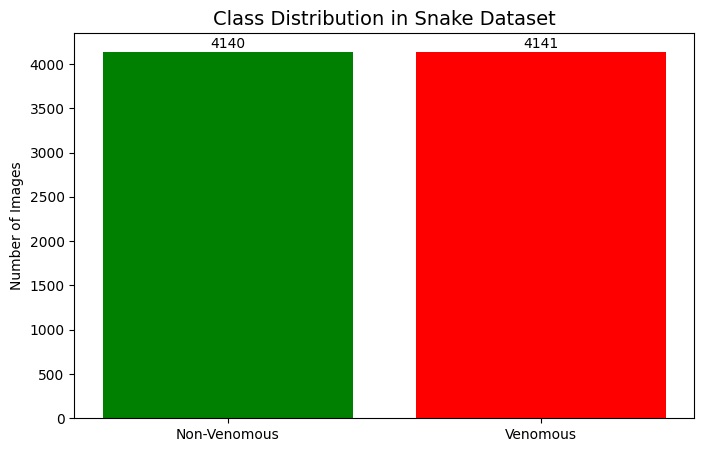

In [15]:
# visualization - Bar chart for class weight distribution
plt.figure(figsize=(8, 5))
classes = ['Non-Venomous', 'Venomous']
counts = [num_nonVenomous, num_venomous]
colors = ['green', 'red']

plt.bar(classes, counts, color=colors)
plt.title('Class Distribution in Snake Dataset', fontsize=14)
plt.ylabel('Number of Images')
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()